In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cleaned_dataset.csv')
data

Age  Body Temperature(F)  Heart rate(bpm)  \
0      20                 97.5               91   
1      45                 97.7               99   
2      29                 98.6               84   
3      26                 99.5              135   
4      38                102.5               51   
...   ...                  ...              ...   
6096   24                 96.0              101   
6097   38                 96.0               59   
6098   40                103.3              145   
6099   21                 99.0              130   
6100   29                 98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                161                              100   
1                                 99                               94   
2                                129                               87   
3                                161                              101   
4                                106                               91   
...                              ...                              ...   
6096                             142                               97   
6097                             129                               94   
6098                             123                               95   
6099                             152                               99   
6100                             136                               80   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
0            24.9                    41                                5.8   
1            22.1                    36                                5.7   
2            19.0                    42                                6.4   
3            23.7                    46                                4.5   
4            18.8                    38                                4.3   
...           ...                   ...                                ...   
6096         20.3                    39                                6.7   
6097         20.0                    39                                7.0   
6098         24.6                    36                                5.0   
6099         23.2                    47                                6.6   
6100         24.9                    38                                4.5   

        Outcome  
0     high risk  
1     high risk  
2      mid risk  
3     high risk  
4     high risk  
...         ...  
6096   mid risk  
6097  high risk  
6098  high risk  
6099  high risk  
6100   low risk  

[6101 rows x 9 columns]

In [3]:
#checking for the columns in the dataset
data.columns

Index(['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')

In [5]:
data.shape

(6101, 9)

In [6]:
# Checking for the top data in the dataset
data.head()

Age  Body Temperature(F)  Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0   20                 97.5               91                             161   
1   45                 97.7               99                              99   
2   29                 98.6               84                             129   
3   26                 99.5              135                             161   
4   38                102.5               51                             106   

   Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                              100         24.9                    41   
1                               94         22.1                    36   
2                               87         19.0                    42   
3                              101         23.7                    46   
4                               91         18.8                    38   

   Blood Glucose(Fasting hour-mg/dl)    Outcome  
0                                5.8  high risk  
1                                5.7  high risk  
2                                6.4   mid risk  
3                                4.5  high risk  
4                                4.3  high risk

In [7]:
# checking for the bottom data in the dataset
data.tail()

Age  Body Temperature(F)  Heart rate(bpm)  \
6096   24                 96.0              101   
6097   38                 96.0               59   
6098   40                103.3              145   
6099   21                 99.0              130   
6100   29                 98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
6096                             142                               97   
6097                             129                               94   
6098                             123                               95   
6099                             152                               99   
6100                             136                               80   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
6096         20.3                    39                                6.7   
6097         20.0                    39                                7.0   
6098         24.6                    36                                5.0   
6099         23.2                    47                                6.6   
6100         24.9                    38                                4.5   

        Outcome  
6096   mid risk  
6097  high risk  
6098  high risk  
6099  high risk  
6100   low risk

In [8]:
#checking for the null values in the dataset
data.isnull().any()

Age                                  False
Body Temperature(F)                  False
Heart rate(bpm)                      False
Systolic Blood Pressure(mm Hg)       False
Diastolic Blood Pressure(mm Hg)      False
BMI(kg/m 2)                          False
Blood Glucose(HbA1c)                 False
Blood Glucose(Fasting hour-mg/dl)    False
Outcome                              False
dtype: bool

In [9]:
# Checking for the number of duplicated rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 1


In [17]:
# checking for the duplicate values in the dataset
# Check for duplicated rows
duplicates = data.duplicated()
# Display rows that are duplicated
print(data[duplicates])

Empty DataFrame
Columns: [Age, Body Temperature(F), Heart rate(bpm), Systolic Blood Pressure(mm Hg), Diastolic Blood Pressure(mm Hg), BMI(kg/m 2), Blood Glucose(HbA1c), Blood Glucose(Fasting hour-mg/dl), Outcome]
Index: []


In [11]:
# Remove duplicated rows
data = data.drop_duplicates()

In [12]:
# Count the number of duplicated rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


In [16]:
# getting the overall summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6100 entries, 0 to 6100
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6100 non-null   int64  
 1   Body Temperature(F)                6100 non-null   float64
 2   Heart rate(bpm)                    6100 non-null   int64  
 3   Systolic Blood Pressure(mm Hg)     6100 non-null   int64  
 4   Diastolic Blood Pressure(mm Hg)    6100 non-null   int64  
 5   BMI(kg/m 2)                        6100 non-null   float64
 6   Blood Glucose(HbA1c)               6100 non-null   int64  
 7   Blood Glucose(Fasting hour-mg/dl)  6100 non-null   float64
 8   Outcome                            6100 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 476.6+ KB


In [14]:
#generating a summary of the key statistical properties of the columns in a DataFrame
data.describe()

Age  Body Temperature(F)  Heart rate(bpm)  \
count  6100.000000          6100.000000      6100.000000   
mean     26.389508            98.675279        86.106721   
std       5.714336             1.400127        22.631509   
min      15.000000            93.000000        45.000000   
25%      22.000000            98.600000        72.000000   
50%      25.000000            98.600000        80.000000   
75%      30.000000            98.800000        91.000000   
max      48.000000           104.000000       150.000000   

       Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
count                     6100.000000                      6100.000000   
mean                       129.218197                        87.257705   
std                         17.238138                         7.794866   
min                         90.000000                         9.000000   
25%                        120.000000                        82.000000   
50%                        128.000000                        87.000000   
75%                        141.000000                        92.000000   
max                        169.000000                       142.000000   

       BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  
count  6100.000000           6100.000000                        6100.000000  
mean     21.435844             37.903770                           5.504590  
std       2.156967              4.401004                           0.905518  
min      14.900000             30.000000                           3.500000  
25%      19.600000             34.000000                           4.800000  
50%      21.300000             38.000000                           5.700000  
75%      23.100000             41.000000                           6.000000  
max      27.900000             50.000000                           8.900000

In [15]:
#Checking for the missing values in the dataframe
missing_values=data.isnull().sum()
print(missing_values)

Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64


In [18]:
# Basic libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For advanced statistical visualizations

In [19]:
data.columns = data.columns.str.strip()

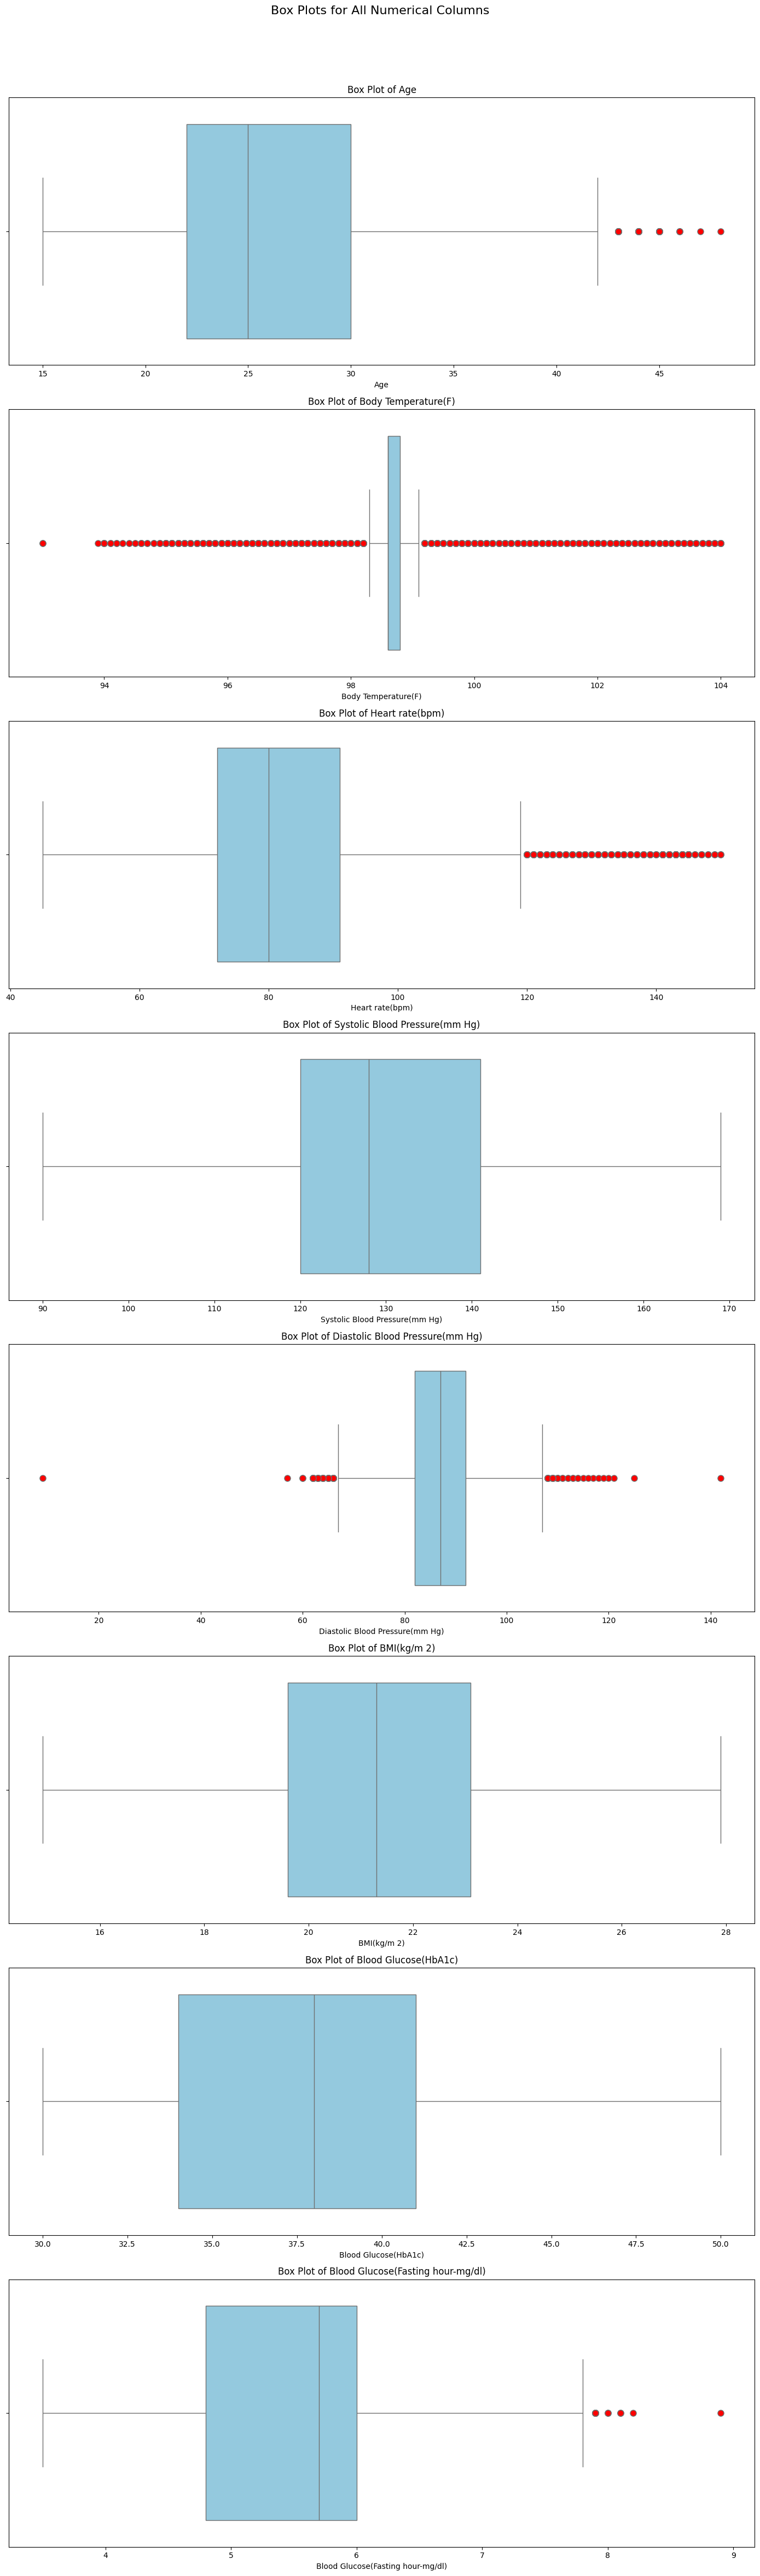

In [20]:
#boxplot for the columns for detecting outliers
# List of numerical columns to create plots for
numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Define properties for outliers in box plots with a circle marker
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Set up the figure and axes for box plots
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(14, 6 * len(numerical_columns)))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

# Generate box plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], color='skyblue', flierprops=flierprops, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()

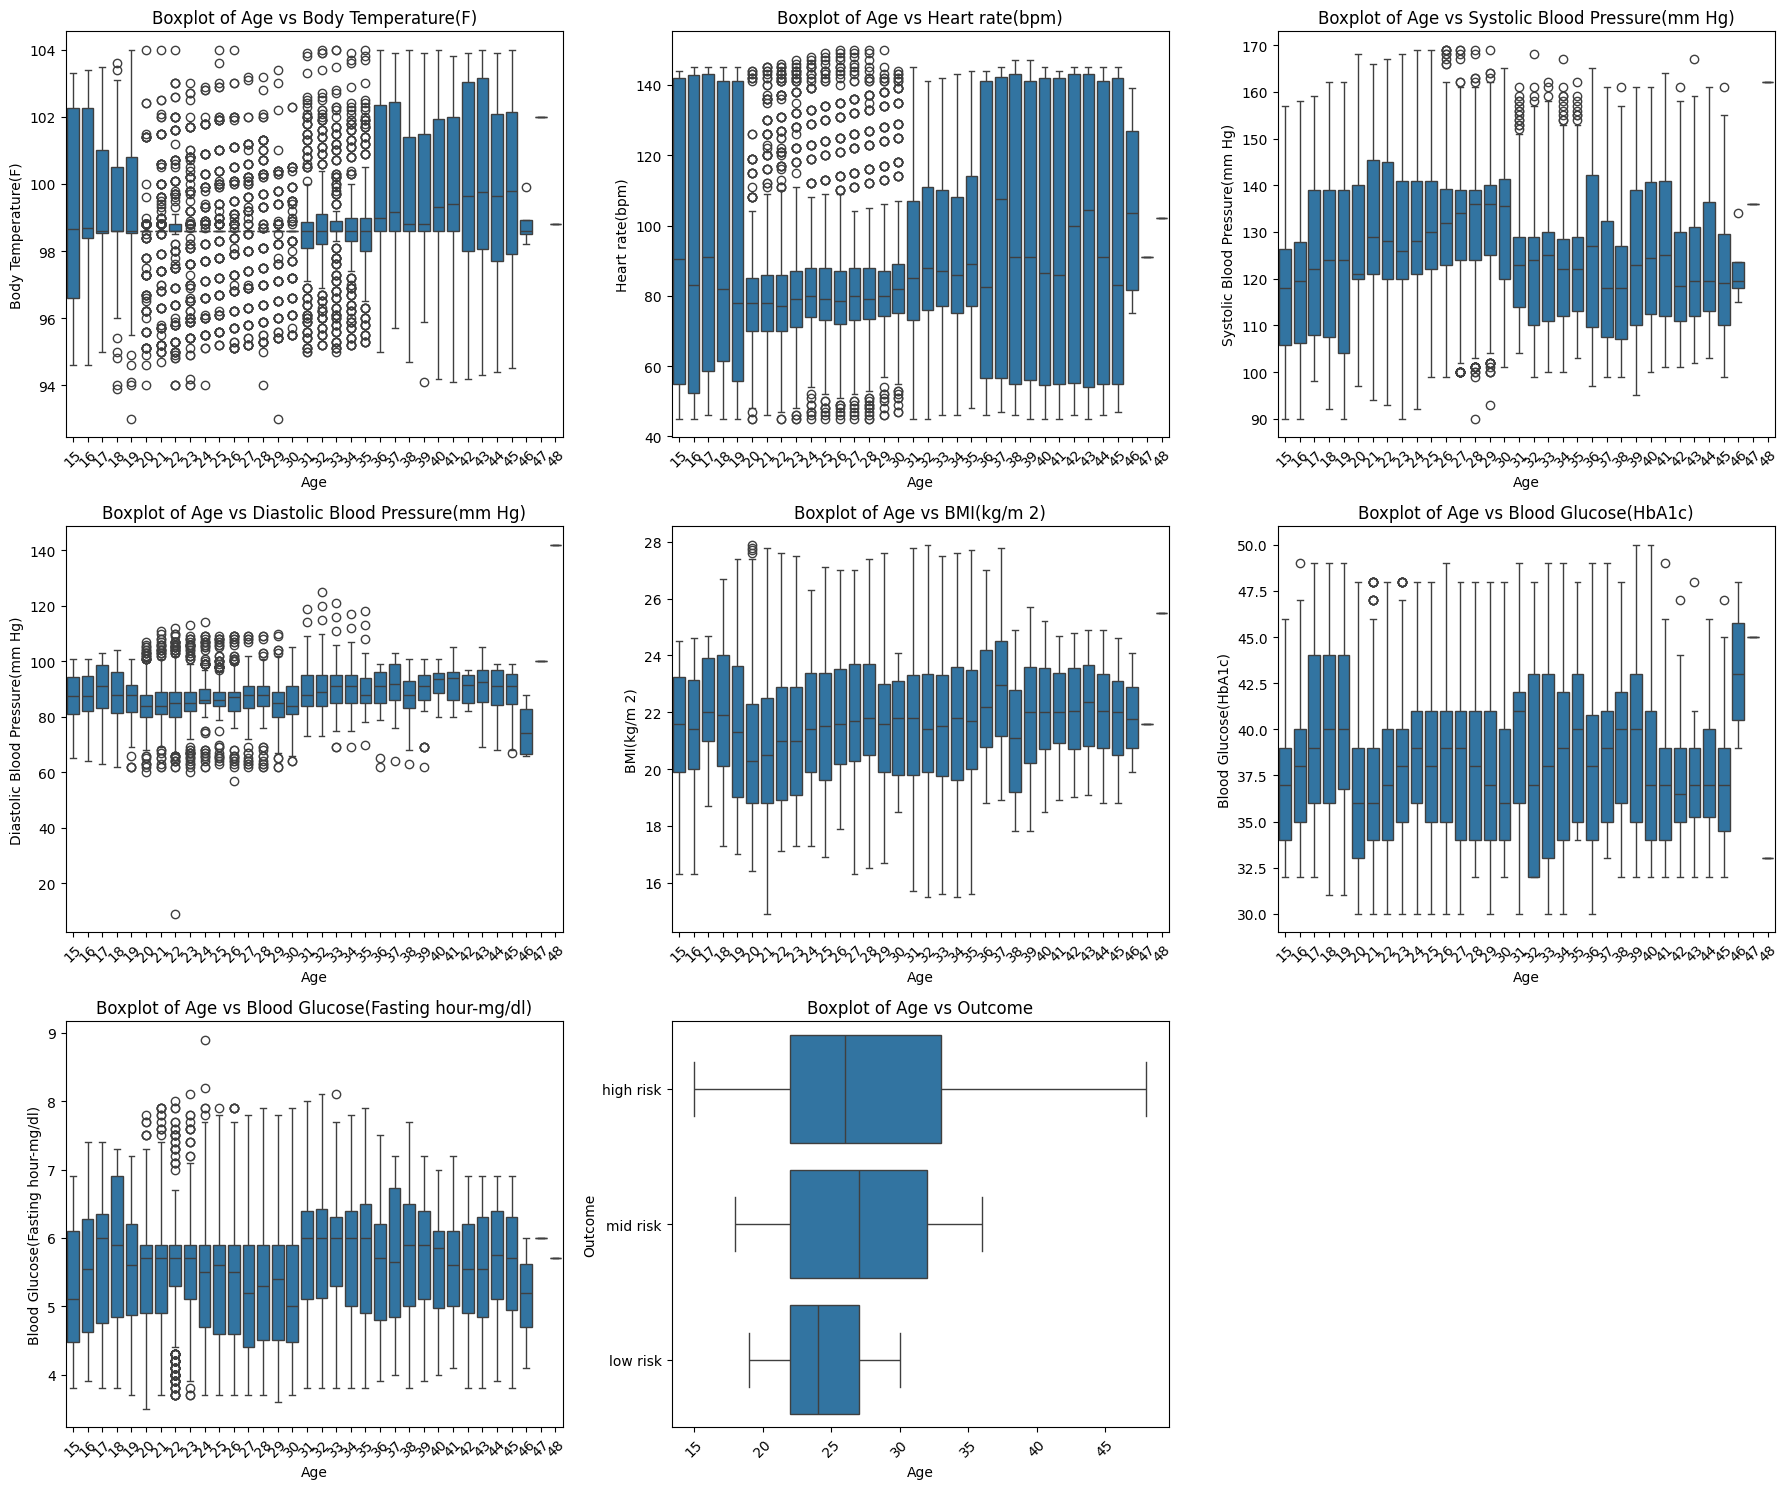

In [21]:
# Box plot for relationship between the variables and the aoutcome

# List of columns to plot against 'Age'
columns_to_plot = [
    'Body Temperature(F)',
    'Heart rate(bpm)',
    'Systolic Blood Pressure(mm Hg)',
    'Diastolic Blood Pressure(mm Hg)',
    'BMI(kg/m 2)',
    'Blood Glucose(HbA1c)',
    'Blood Glucose(Fasting hour-mg/dl)',
    'Outcome'  # Keep Outcome for age vs risk
]

# Create box plots for 'Age' vs each column
plt.figure(figsize=(18, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size as needed
    sns.boxplot(x='Age', y=column, data=data)
    plt.title(f'Boxplot of Age vs {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

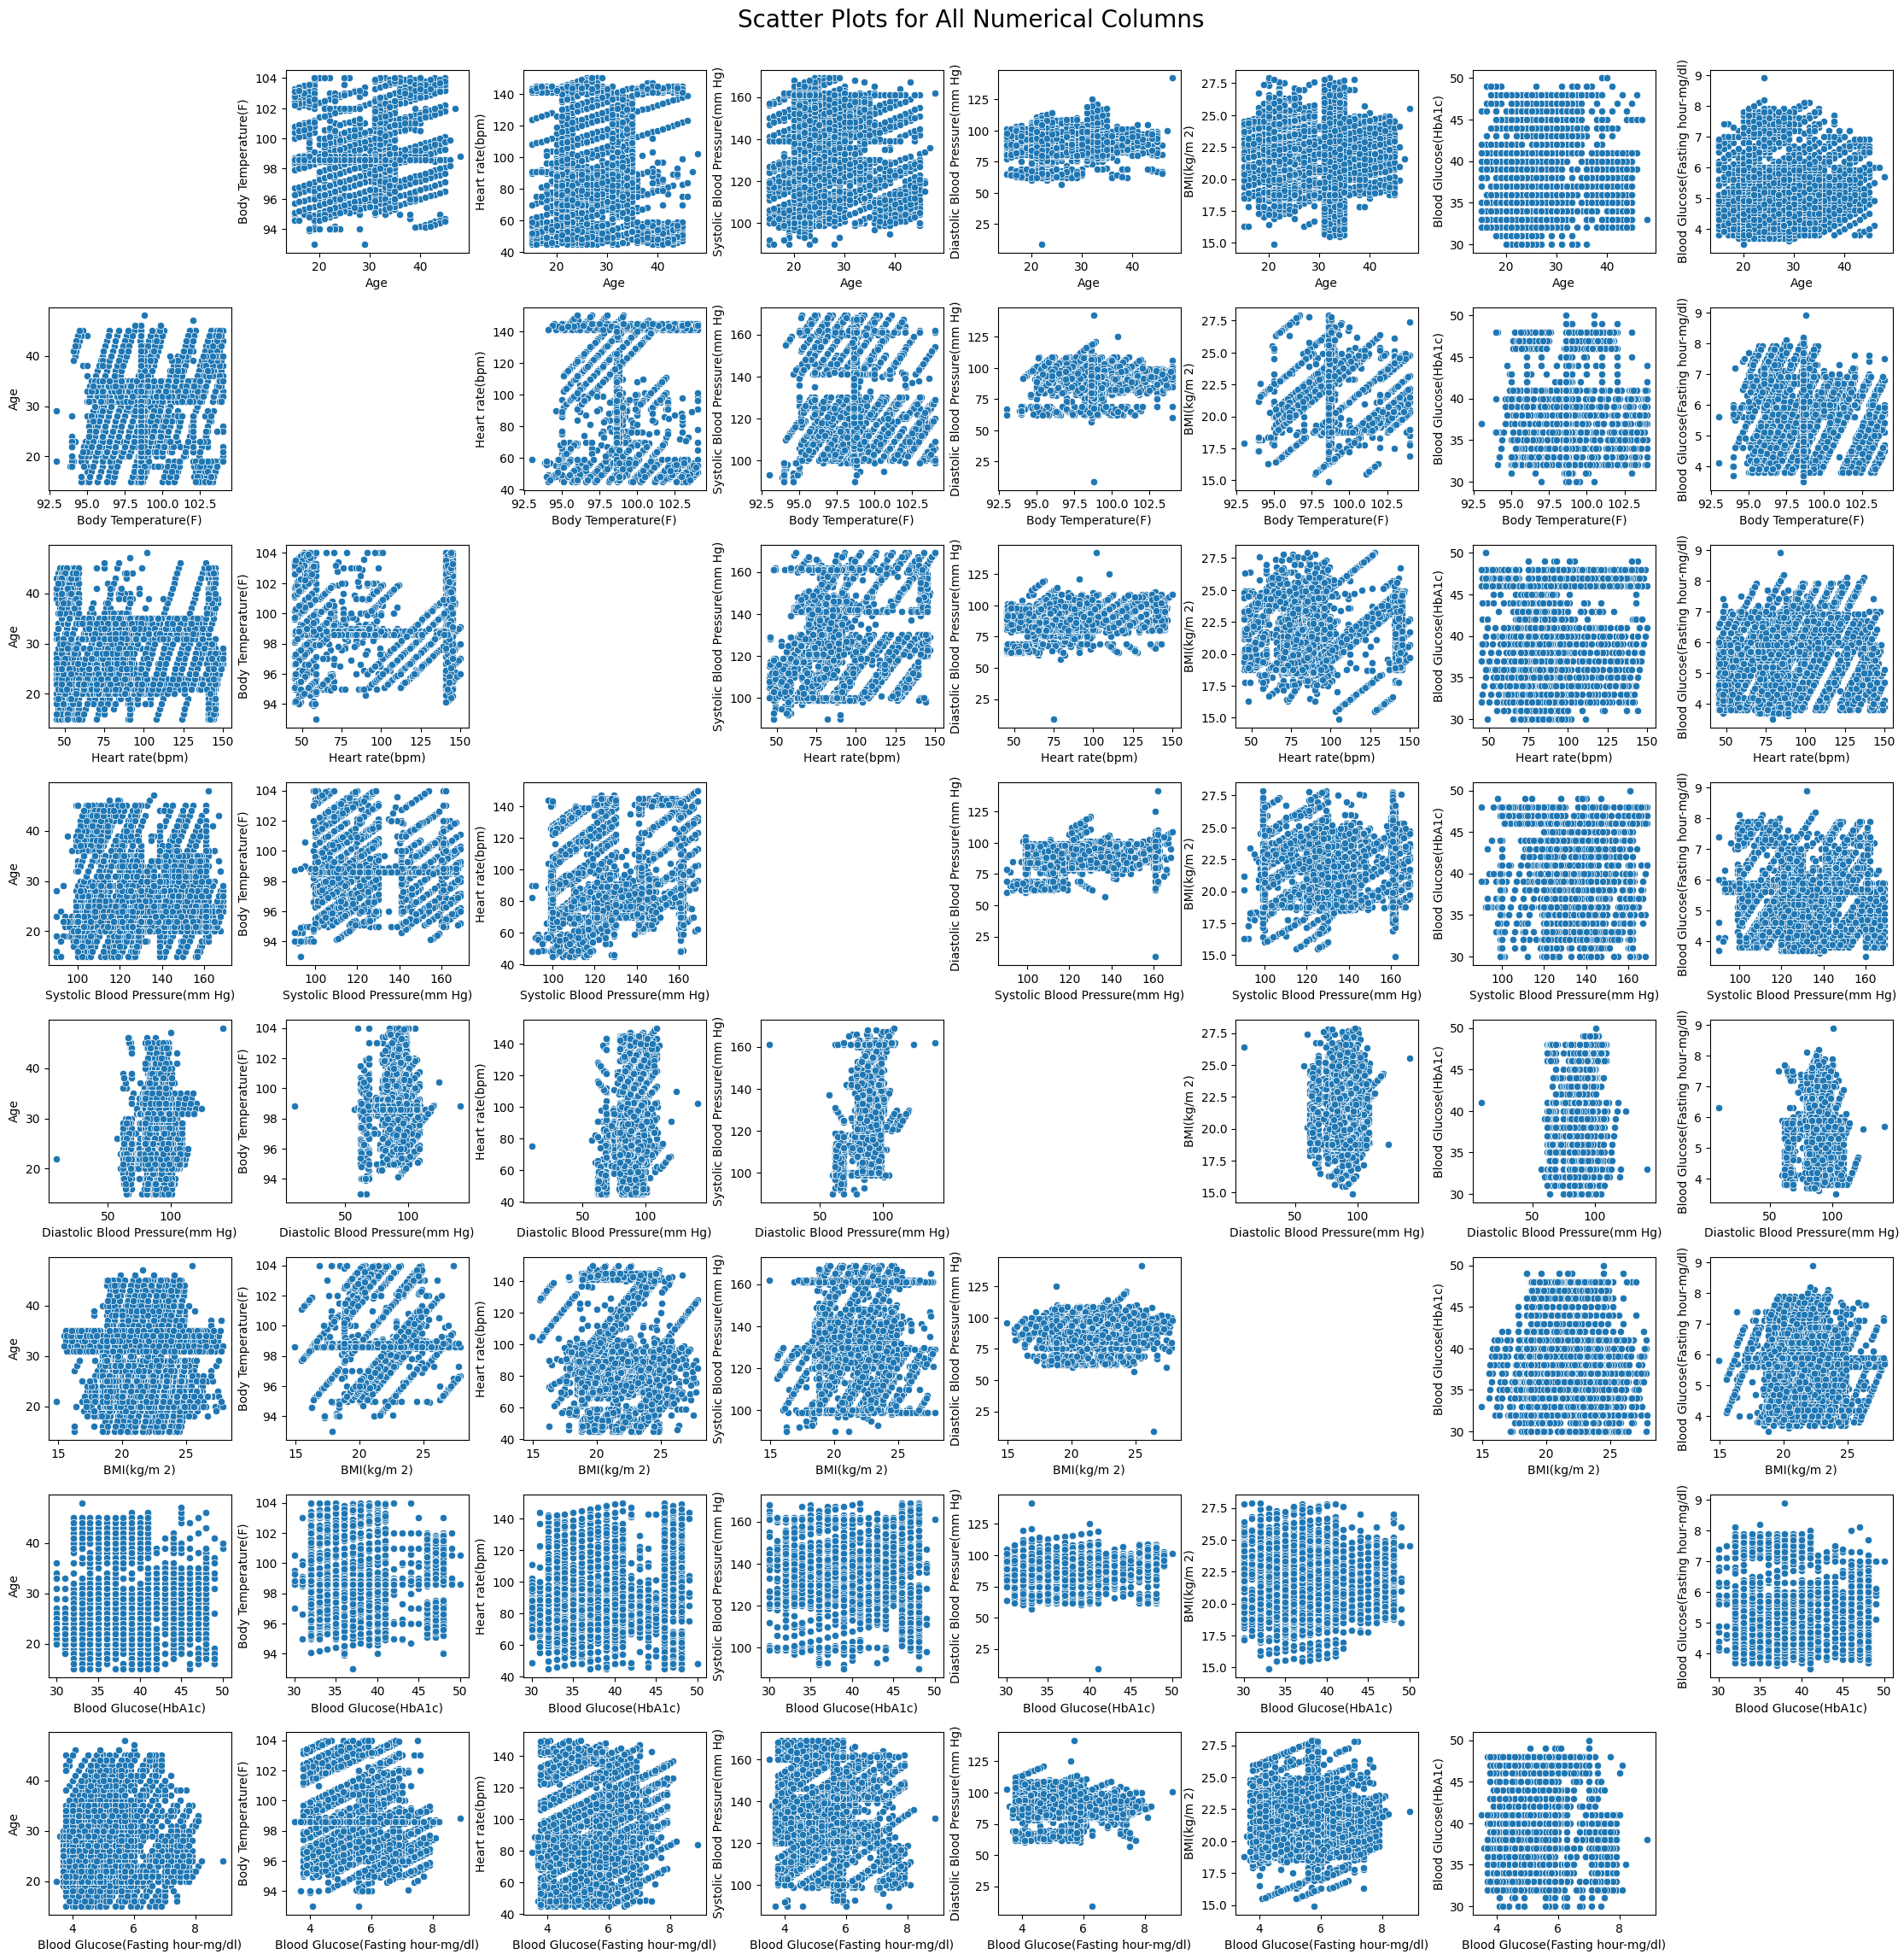

In [22]:
#Scatter plot for the columns in the dataframe

# List of numerical columns to create scatter plots for
numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Set up a larger figure size for the scatter plots
fig, axes = plt.subplots(len(numerical_columns), len(numerical_columns), figsize=(24, 24))
fig.suptitle('Scatter Plots for All Numerical Columns', fontsize=20)

# Generate scatter plots for each combination of numerical columns
for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        if i != j:
            sns.scatterplot(x=data[numerical_columns[i]], y=data[numerical_columns[j]], ax=axes[i, j])
            axes[i, j].set_xlabel(numerical_columns[i])
            axes[i, j].set_ylabel(numerical_columns[j])
        else:
            axes[i, j].axis('off')  # Hide the diagonal plots

# Adjust the layout for better spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
plt.show()

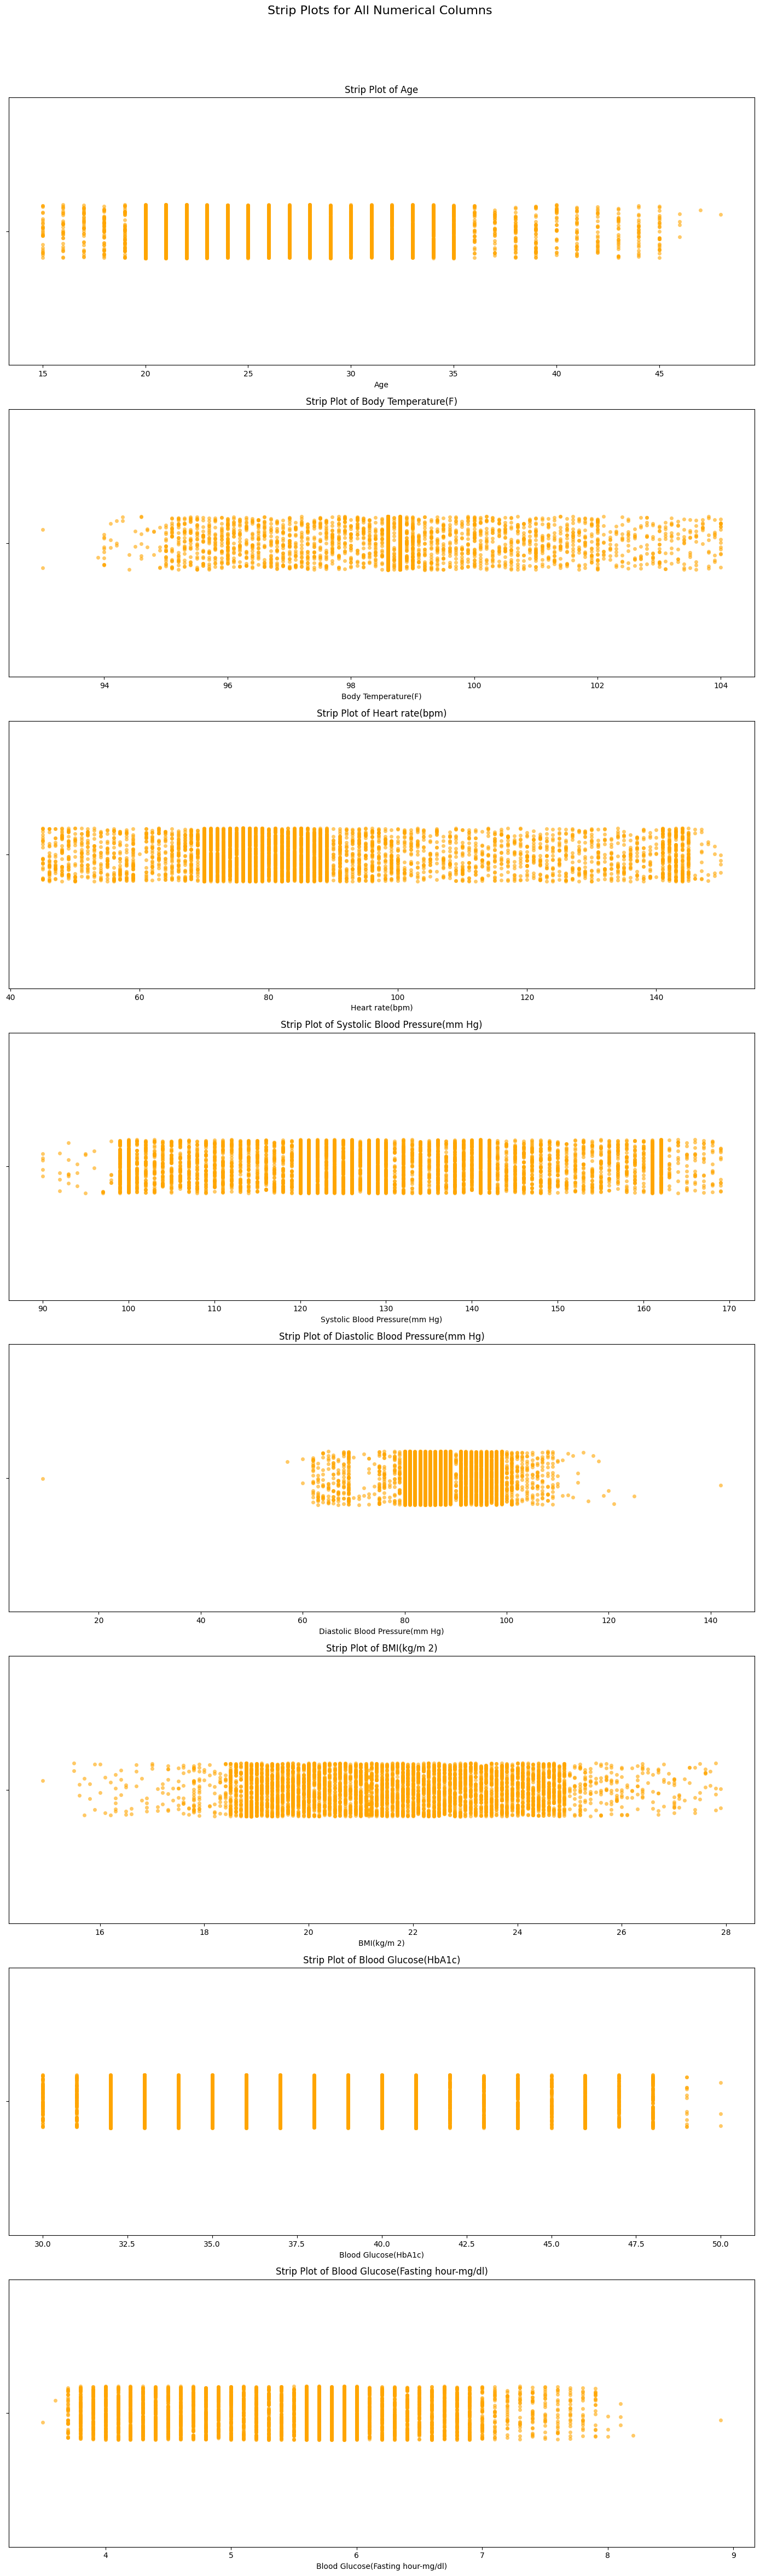

In [23]:
# strip plot for detecting the outliers

# List of numerical columns to create strip plots for
numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Set up the figure and axes for strip plots
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(14, 6 * len(numerical_columns)))
fig.suptitle('Strip Plots for All Numerical Columns', fontsize=16)

# Generate strip plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.stripplot(x=data[col], jitter=True, color='orange', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Strip Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()

In [24]:
# detecting some big outliers
rows_with_age_above_200 = data[data['Age'] > 200]
rows_with_age_above_200

Empty DataFrame
Columns: [Age, Body Temperature(F), Heart rate(bpm), Systolic Blood Pressure(mm Hg), Diastolic Blood Pressure(mm Hg), BMI(kg/m 2), Blood Glucose(HbA1c), Blood Glucose(Fasting hour-mg/dl), Outcome]
Index: []

In [25]:
Diastolic_BloodPressure_outlier=data[data['Diastolic Blood Pressure(mm Hg)']<20]
Diastolic_BloodPressure_outlier

Age  Body Temperature(F)  Heart rate(bpm)  \
4164   22                 98.8               75   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
4164                             161                                9   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
4164         26.4                    41                                6.3   

        Outcome  
4164  high risk

In [26]:
# Remove rows based on the outlier conditions

data = data[data['Body Temperature(F)'] >= 50]  # Body temperature should be >= 50
data = data[data['Age'] <= 100]  # Age should be <= 100
data = data[data['Diastolic Blood Pressure(mm Hg)'] >= 30]  # Diastolic BP should be >= 30
data = data[data['Diastolic Blood Pressure(mm Hg)'] <= 140]  # Diastolic BP should be <= 140
data = data[data['Blood Glucose(Fasting hour-mg/dl)'] <= 8.5]  # Blood Glucose (Fasting hour) should be <= 8.5
data = data[data['Body Temperature(F)'] >= 94]  # Body temperature should be >= 94

print("DataFrame after removing outliers:")
print(data)

DataFrame after removing outliers:
      Age  Body Temperature(F)  Heart rate(bpm)  \
0      20                 97.5               91   
1      45                 97.7               99   
2      29                 98.6               84   
3      26                 99.5              135   
4      38                102.5               51   
...   ...                  ...              ...   
6096   24                 96.0              101   
6097   38                 96.0               59   
6098   40                103.3              145   
6099   21                 99.0              130   
6100   29                 98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                161                              100   
1                                 99                               94   
2                                129                               87   
3                                161                        

In [27]:
# Remove rows based on the outlier conditions

data = data[data['Body Temperature(F)'] >= 50]  # Body temperature should be >= 50
data = data[data['Age'] <= 100]  # Age should be <= 100
data = data[data['Diastolic Blood Pressure(mm Hg)'] >= 30]  # Diastolic BP should be >= 30
data = data[data['Diastolic Blood Pressure(mm Hg)'] <= 140]  # Diastolic BP should be <= 140
data = data[data['Blood Glucose(Fasting hour-mg/dl)'] <= 8.5]  # Blood Glucose (Fasting hour) should be <= 8.5
data = data[data['Body Temperature(F)'] >= 94]  # Body temperature should be >= 94

print("DataFrame after removing outliers:")
print(data)

DataFrame after removing outliers:
      Age  Body Temperature(F)  Heart rate(bpm)  \
0      20                 97.5               91   
1      45                 97.7               99   
2      29                 98.6               84   
3      26                 99.5              135   
4      38                102.5               51   
...   ...                  ...              ...   
6096   24                 96.0              101   
6097   38                 96.0               59   
6098   40                103.3              145   
6099   21                 99.0              130   
6100   29                 98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                161                              100   
1                                 99                               94   
2                                129                               87   
3                                161                        

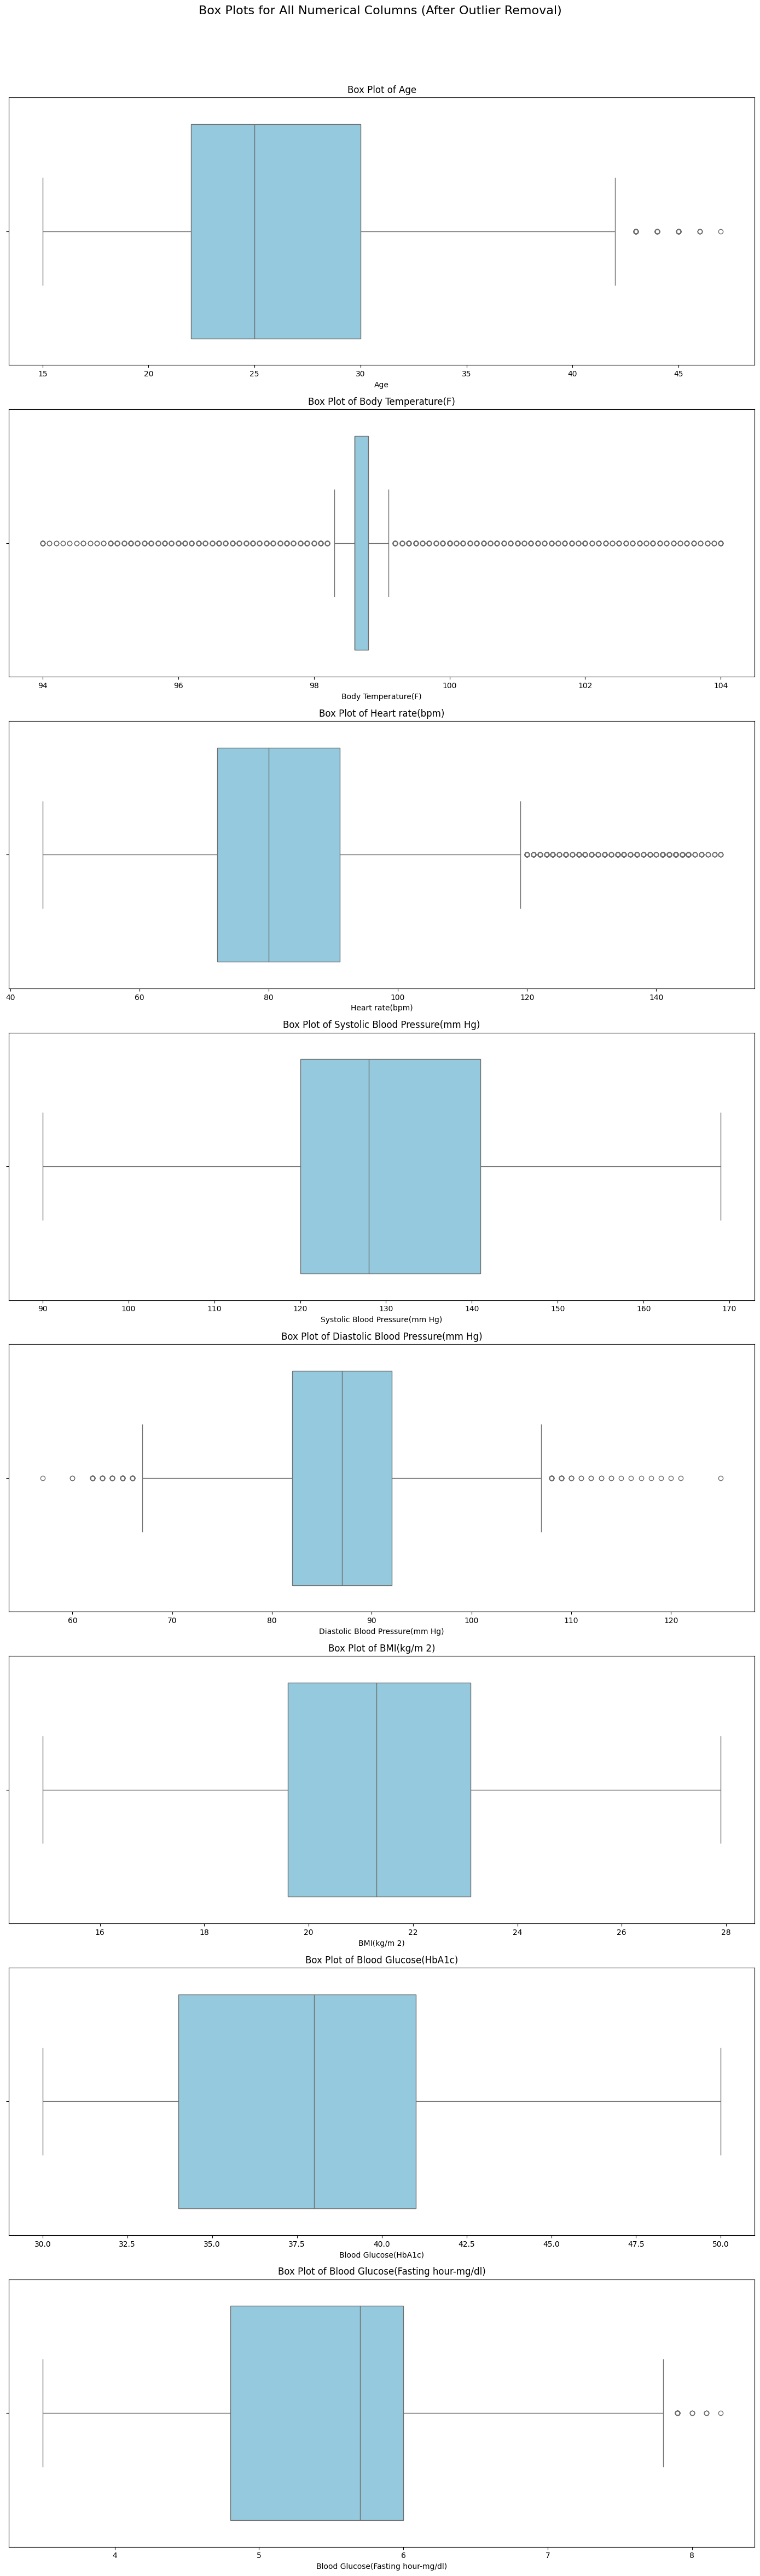

In [28]:
# Box plot after removing the outliers

data = data[data['Body Temperature(F)'] >= 50]
data = data[data['Age'] <= 100]
data = data[data['Diastolic Blood Pressure(mm Hg)'] >= 30]

# List of numerical columns for boxplots
numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Create the boxplots
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(14, 6 * len(numerical_columns)))
fig.suptitle('Box Plots for All Numerical Columns (After Outlier Removal)', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

Index(['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')


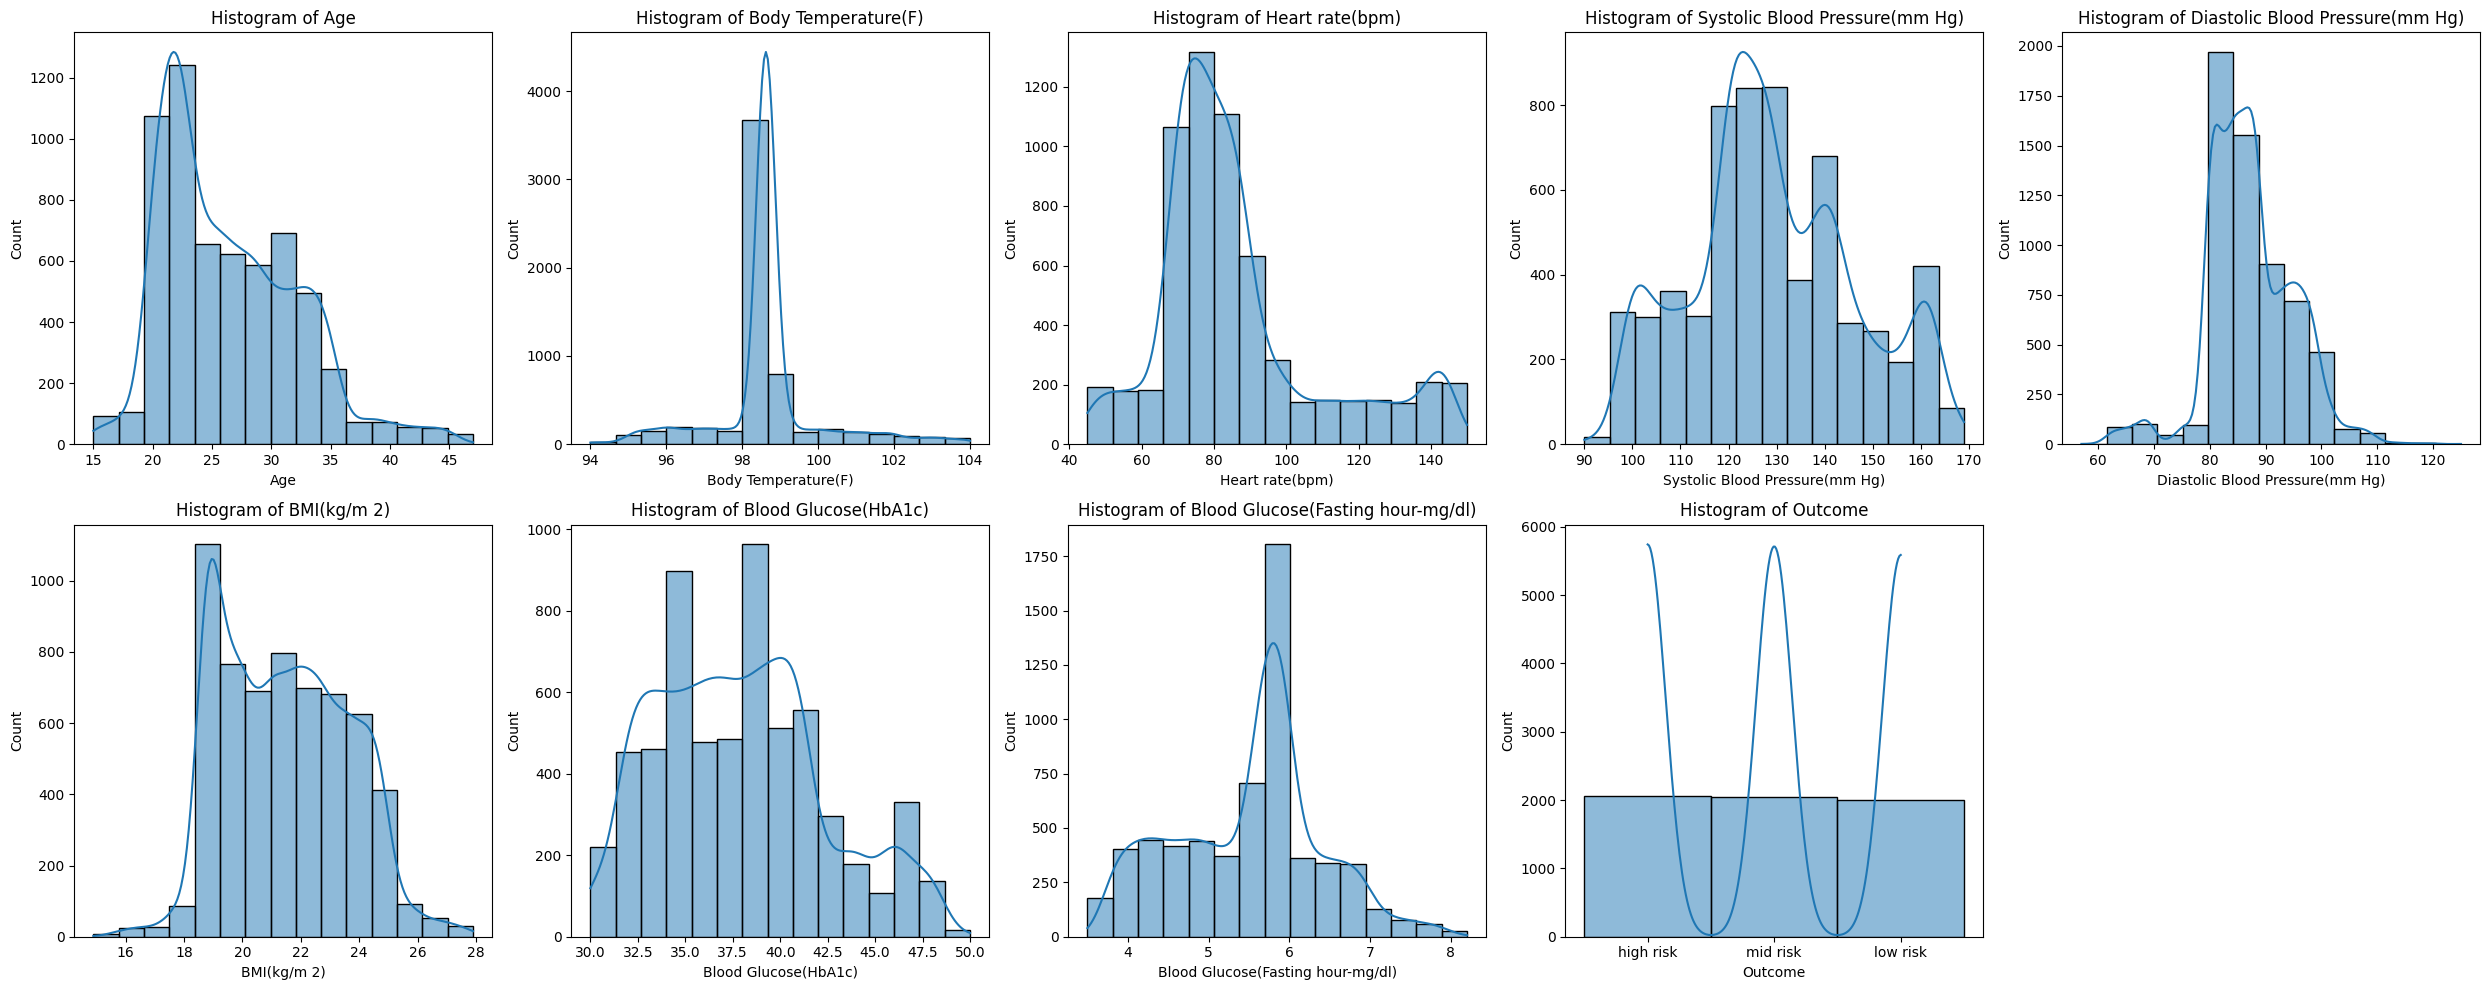

In [29]:
# KDE plot

# List of columns
columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
           'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
           'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
           'Blood Glucose(Fasting hour-mg/dl)', 'Outcome']

# Print available columns to check for typos or case sensitivity
print(data.columns)

# Number of columns to display (based on how many columns you have)
num_plots = len(columns)

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = int(np.ceil(num_plots / num_rows))  # Automatically calculate the number of columns

# Create subplots with 2 rows and calculated columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten axes array if needed (in case the number of plots is less than the grid size)
axes = axes.flatten()

# Loop through each column and plot histogram
for i, col in enumerate(columns):
    # Check if the column exists in the DataFrame before accessing it
    if col in data.columns:
        # Plotting the histogram and KDE
        sns.histplot(data[col], bins=15, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
    else:
        print(f"Column '{col}' not found in the DataFrame.")
        axes[i].set_title(f"Column '{col}' not found")

# Hide unused axes (if there are fewer columns than subplots)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

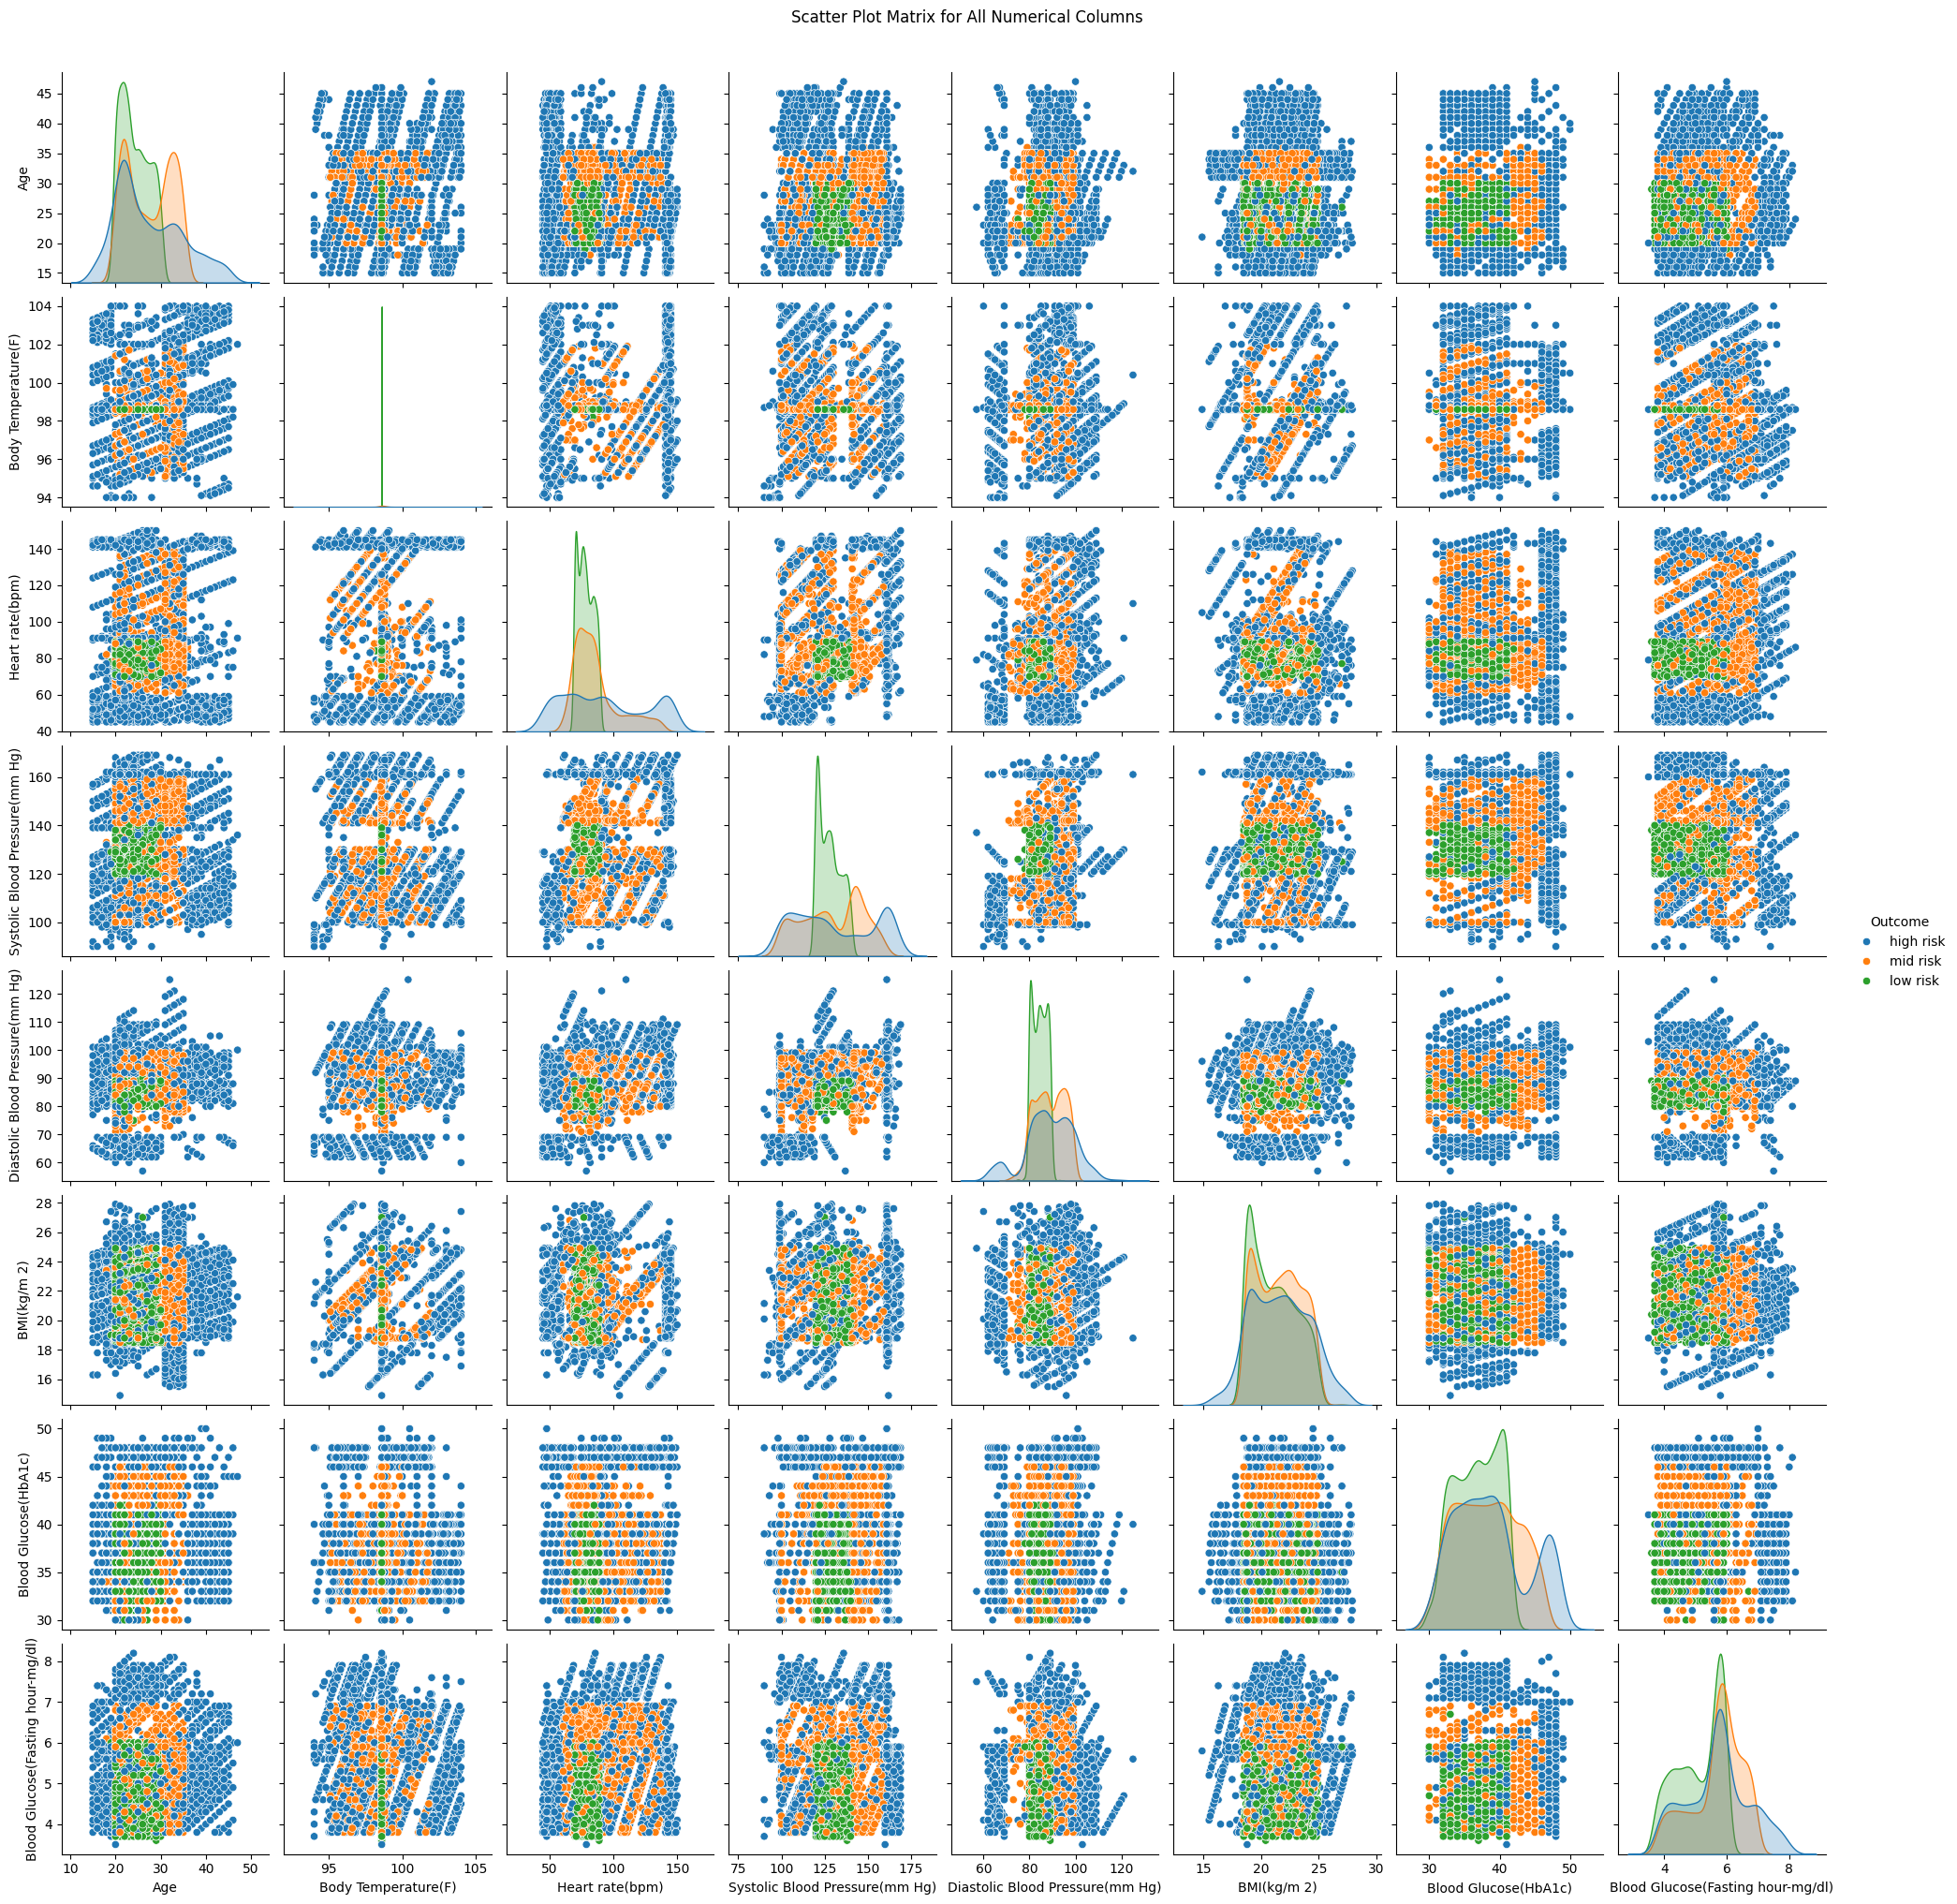

In [30]:
# Bivariate analysis- Scatter plot

numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Create a pair plot (scatter plot matrix)
sns.pairplot(data=data, vars=numerical_columns, kind='scatter', diag_kind='kde', hue='Outcome')

# Display the plot
plt.suptitle('Scatter Plot Matrix for All Numerical Columns', y=1.02)  # Adjust the title position
plt.show()

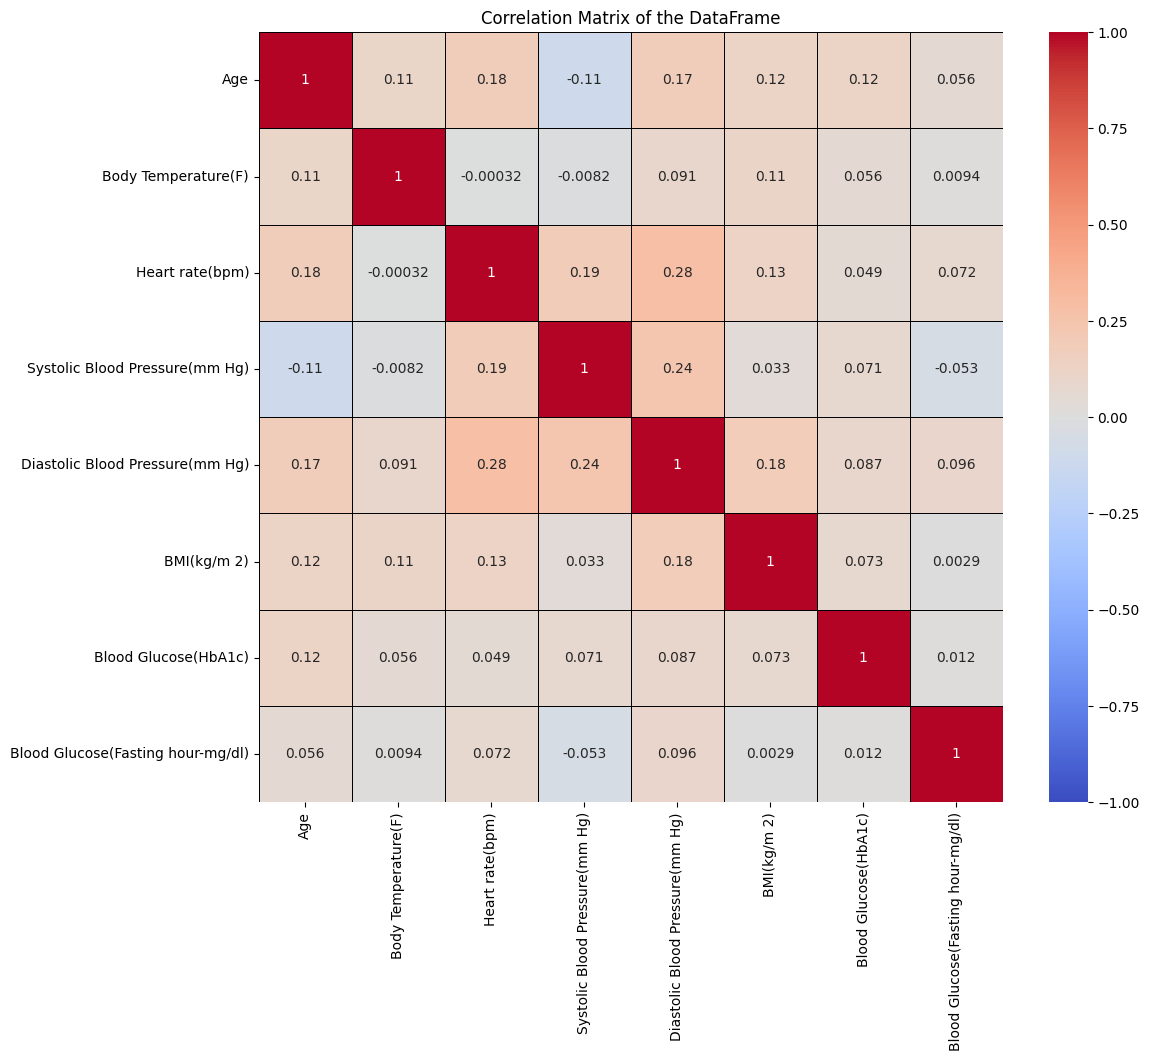

In [31]:
# Correlation matrix

# Calculate the correlation matrix for only numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Add a title
plt.title('Correlation Matrix of the DataFrame')

# Display the heatmap
plt.show()

In [48]:
pip install numpy pandas scikit-learn xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.9 MB/s eta 0:01:06
   ---------------------------------------- 1.0/124.9 MB 1.9 MB/s eta 0:01:05
    --------------------------------------- 1.6/124.9 MB 2.0 MB/s eta 0:01:04
    --------------------------------------- 1.8/124.9 MB 1.9 MB/s eta 0:01:04
    --------------------------------------- 2.4/124.9 MB 1.9 MB/s eta 0:01:04
    --------------------------------------- 2.6/124.9 MB 1.9 MB/s eta 0:01:04
   - -------------------------------------- 3.1/124.9 MB 1.9 MB/s eta 0:01:04
   - -------------------------------------- 3.4/124.9 MB 1.9 MB/s eta 0:01:03
   - -------------------------------------- 3.9/124.9 MB 1.9 MB/s eta 0:01:03
   - -------------------------------------- 4.2/124.9 MB 1.9 MB/s eta 0:01:03
   - -------------------------------------- 4.7/124.9 MB 1.9 MB/s eta 0:01:03



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pickle

# Load the cleaned dataset
data = pd.read_csv('cleaned_maternai_data_specific.csv')

# Identify non-numeric columns and apply Label Encoding if any
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
X = data.drop('Outcome', axis=1)  # Replace 'Outcome' with the actual target column name
y = data['Outcome']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save feature order for later use
feature_order = X.columns.tolist()

# Save the scaler and feature order
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('feature_order.pkl', 'wb') as file:
    pickle.dump(feature_order, file)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm}")

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")


# Load and preprocess the data: Including label encoding for categorical variables.

# Split the data into training and testing sets.

# Standardize the features.

# Train models using Logistic Regression, KNN, Random Forest, SVM, and XGBoost.

# Evaluate and print the accuracy of each model.

Logistic Regression Accuracy: 0.556920556920557
K-Nearest Neighbors Accuracy: 0.9066339066339066
Random Forest Accuracy: 0.9901719901719902
Support Vector Machine Accuracy: 0.9295659295659295
XGBoost Accuracy: 0.9893529893529893


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

# K-Nearest Neighbors (KNN)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Support Vector Machine (SVM)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# XGBoost
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print the results
print(f"Logistic Regression: Precision={precision_logreg}, Recall={recall_logreg}, F1 Score={f1_logreg}")
print(f"K-Nearest Neighbors: Precision={precision_knn}, Recall={recall_knn}, F1 Score={f1_knn}")
print(f"Random Forest: Precision={precision_rf}, Recall={recall_rf}, F1 Score={f1_rf}")
print(f"Support Vector Machine: Precision={precision_svm}, Recall={recall_svm}, F1 Score={f1_svm}")
print(f"XGBoost: Precision={precision_xgb}, Recall={recall_xgb}, F1 Score={f1_xgb}")

Logistic Regression: Precision=0.5535330272043195, Recall=0.556920556920557, F1 Score=0.5508707501340876
K-Nearest Neighbors: Precision=0.9090299395185291, Recall=0.9066339066339066, F1 Score=0.9056150058712966
Random Forest: Precision=0.9901824409540562, Recall=0.9901719901719902, F1 Score=0.9901701875483605
Support Vector Machine: Precision=0.9314781800653594, Recall=0.9295659295659295, F1 Score=0.9291339469908803
XGBoost: Precision=0.9893508591235864, Recall=0.9893529893529893, F1 Score=0.9893509043881435


In [51]:
# Hyperparameter Tuning Example for XGBoost:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best Accuracy: 0.9913934426229508


In [52]:
# Model Validation: Perform cross-validation to further validate the performance of the tuned XGBoost model.
from sklearn.model_selection import cross_val_score

# Use the best parameters found in GridSearchCV
xgb_best = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, eval_metric='logloss')
cv_scores = cross_val_score(xgb_best, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

Cross-Validation Scores: [0.99426699 0.98852459 0.99508197 0.98934426 0.99262295]
Mean Accuracy: 0.9919681529517594
Standard Deviation: 0.002613510962156663


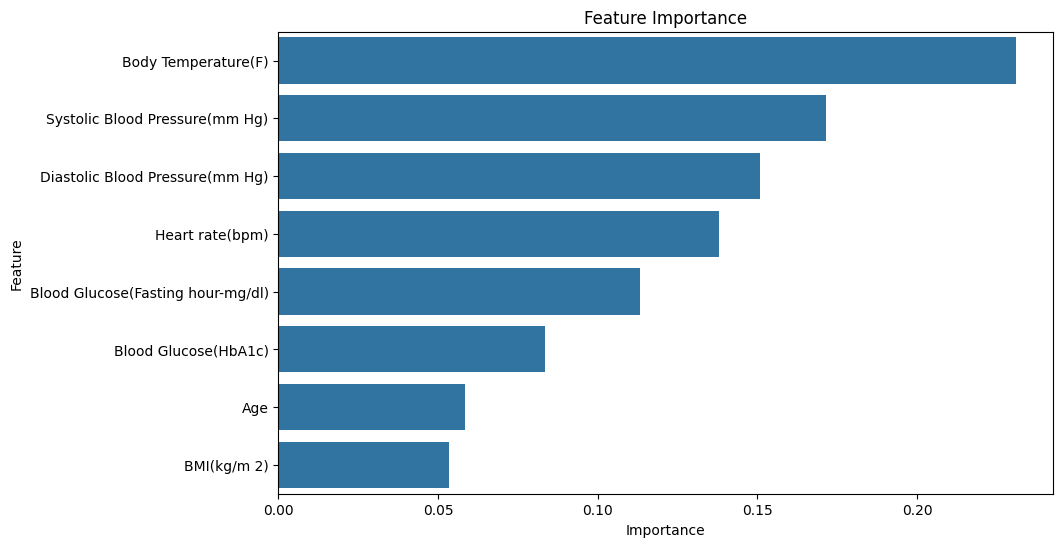

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model with best parameters
xgb_best.fit(X_train, y_train)

# Get feature importance
feature_importances = xgb_best.feature_importances_
features = pd.DataFrame({
    'Feature': feature_order,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance')
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset with new features
data = pd.read_csv('cleaned_maternai_data_specific.csv')

# Strip any leading/trailing spaces from column names
data.rename(columns=lambda x: x.strip(), inplace=True)

# Separate non-numeric data
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64'])
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

# Combine scaled numeric data with non-numeric data
data_scaled = pd.concat([non_numeric_cols.reset_index(drop=True), numeric_scaled], axis=1)

# Print the normalized data
print(data_scaled.head())

# Save the normalized dataset
data_scaled.to_csv('normalized_data_features.csv', index=False)

     Outcome       Age  Body Temperature(F)  Heart rate(bpm)  \
0  high risk -1.118253            -0.839537         0.216327   
1  high risk  3.257363            -0.696670         0.569867   
2   mid risk  0.456969            -0.053766        -0.093021   
3  high risk -0.068105             0.589138         2.160799   
4  high risk  2.032191             2.732152        -1.551375   

   Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                        1.844019                         1.634897   
1                       -1.753237                         0.865041   
2                       -0.012629                        -0.033124   
3                        1.844019                         1.763207   
4                       -1.347095                         0.480114   

   BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  
0     1.606311              0.703675                           0.326210  
1     0.308115             -0.432612          

In [55]:
import pandas as pd

# Load the normalized dataset
data_scaled = pd.read_csv('normalized_data_features.csv')

# Compute Descriptive Statistics
descriptive_stats = data_scaled.describe()

# Compute Mode
mode_stats = data_scaled.mode().iloc[0]

# Print Mean, Standard Deviation, and Mode for all features
print("Descriptive Statistics (Mean, Std, etc.):")
print(descriptive_stats)

print("\nMode of each feature:")
print(mode_stats)

Descriptive Statistics (Mean, Std, etc.):
                Age  Body Temperature(F)  Heart rate(bpm)  \
count  6.101000e+03         6.101000e+03     6.101000e+03   
mean  -3.959753e-17        -1.198408e-14     1.828474e-16   
std    1.000082e+00         1.000082e+00     1.000082e+00   
min   -1.993376e+00        -4.054057e+00    -1.816531e+00   
25%   -7.682035e-01        -5.376560e-02    -6.233316e-01   
50%   -2.431296e-01        -5.376560e-02    -2.697912e-01   
75%    6.319936e-01         8.910196e-02     2.163269e-01   
max    3.782437e+00         3.803658e+00     2.823688e+00   

       Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
count                    6.101000e+03                     6.101000e+03   
mean                    -4.623594e-16                    -7.756457e-16   
std                      1.000082e+00                     1.000082e+00   
min                     -2.275419e+00                    -1.004125e+01   
25%                     -5.348115e-01 

Training Logistic Regression...

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.54      0.44      0.48       397
           1       0.58      0.72      0.65       399
           2       0.54      0.51      0.52       425

    accuracy                           0.56      1221
   macro avg       0.55      0.56      0.55      1221
weighted avg       0.55      0.56      0.55      1221

ROC-AUC Score: 0.7252843917410473


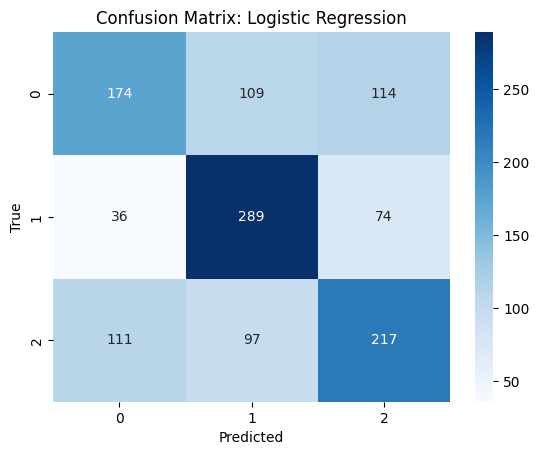

Training K-Nearest Neighbors...

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       397
           1       0.91      0.99      0.95       399
           2       0.87      0.91      0.89       425

    accuracy                           0.91      1221
   macro avg       0.91      0.91      0.91      1221
weighted avg       0.91      0.91      0.91      1221

ROC-AUC Score: 0.977419531252636


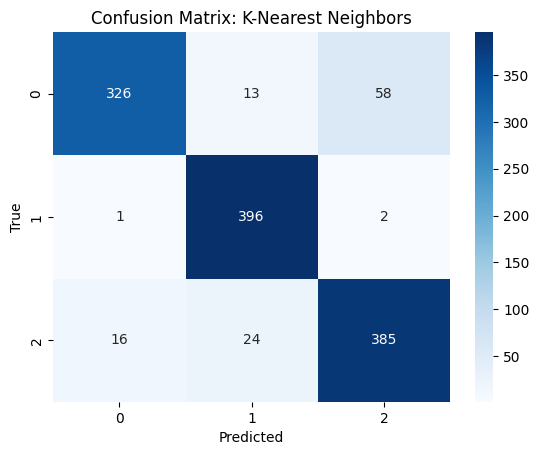

Training Random Forest...

Model: Random Forest
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       397
           1       0.99      0.99      0.99       399
           2       0.99      0.99      0.99       425

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

ROC-AUC Score: 0.9979588184602995


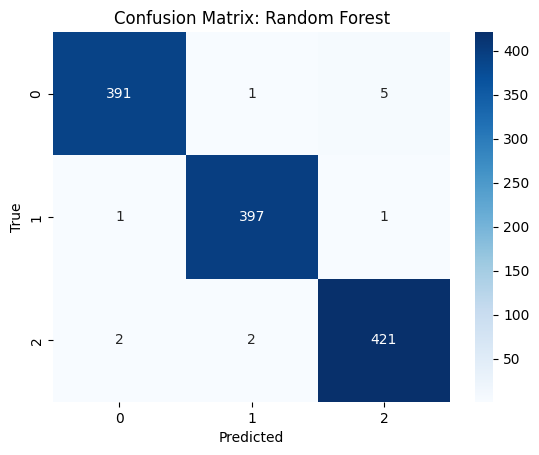

Training Support Vector Machine...

Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       397
           1       0.94      0.99      0.96       399
           2       0.89      0.94      0.91       425

    accuracy                           0.93      1221
   macro avg       0.93      0.93      0.93      1221
weighted avg       0.93      0.93      0.93      1221

ROC-AUC Score: 0.9877074420059953


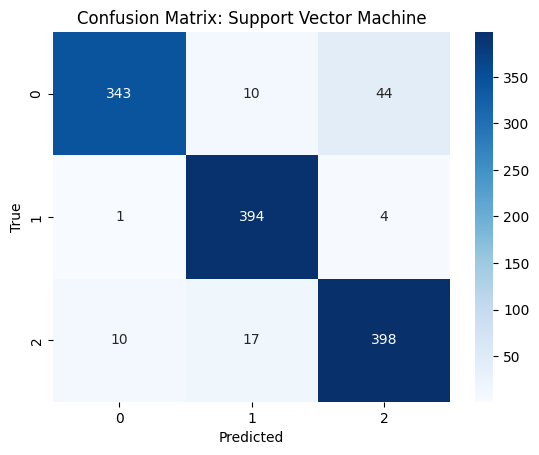

Training XGBoost...

Model: XGBoost
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       0.99      0.99      0.99       399
           2       0.99      0.99      0.99       425

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

ROC-AUC Score: 0.9985310162657924


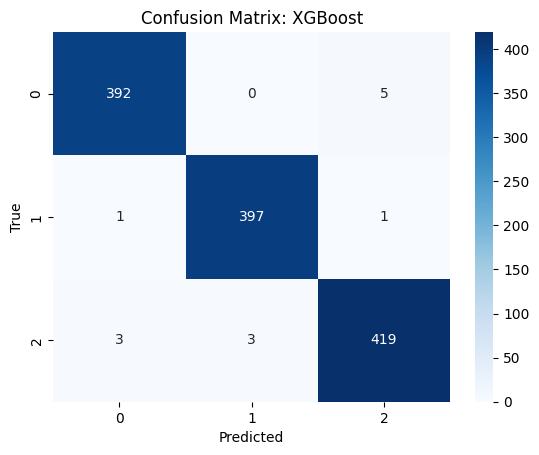


Summary of Model Performance:
                    Model   ROC-AUC  F1-Score
0     Logistic Regression  0.725284  0.550871
1     K-Nearest Neighbors  0.977420  0.905615
2           Random Forest  0.997959  0.990170
3  Support Vector Machine  0.987707  0.929134
4                 XGBoost  0.998531  0.989351

Feature Importance for Random Forest:


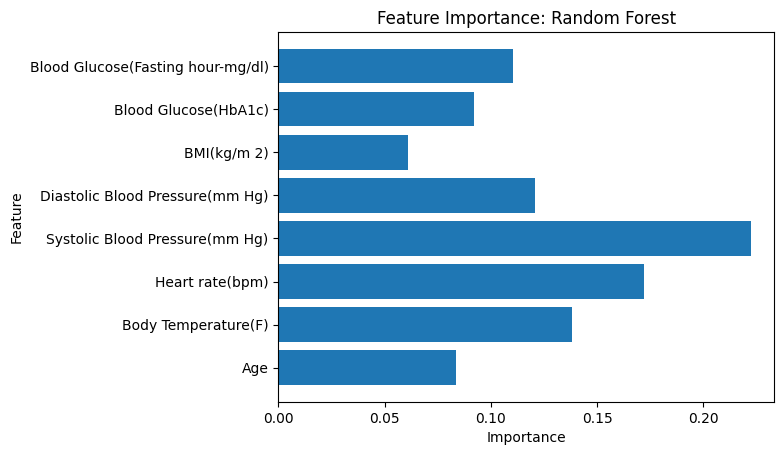


Feature Importance for XGBoost:


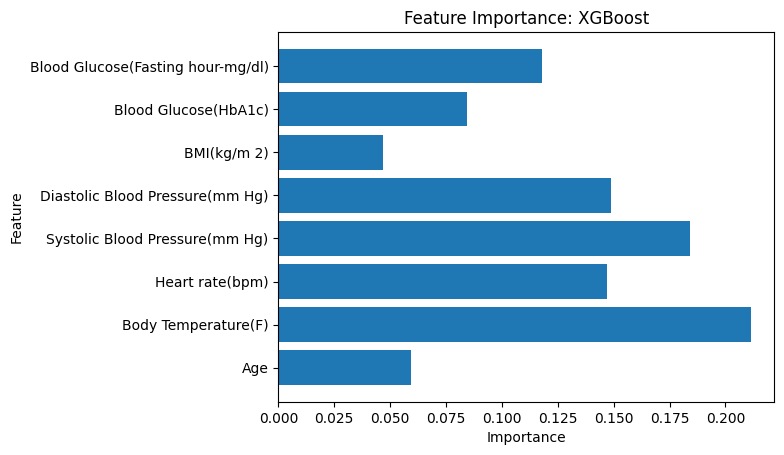


Cross-Validation Scores:
Logistic Regression: Mean ROC-AUC = 0.7335, Std Dev = 0.0084
K-Nearest Neighbors: Mean ROC-AUC = 0.9764, Std Dev = 0.0026
Random Forest: Mean ROC-AUC = 0.9986, Std Dev = 0.0004
Support Vector Machine: Mean ROC-AUC = 0.9884, Std Dev = 0.0030
XGBoost: Mean ROC-AUC = 0.9988, Std Dev = 0.0005


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('normalized_data_features.csv')

# Identify non-numeric columns and apply Label Encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize a results list for storing evaluation metrics
results = []

# Train and Evaluate Models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Classification report
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    if len(set(y)) > 2:  # Multiclass case
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    else:  # Binary case
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    print("ROC-AUC Score:", roc_auc)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Save results
    results.append({
        "Model": model_name,
        "ROC-AUC": roc_auc,
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    })

# Display results as a DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:")
print(results_df)

# Feature Importance for Tree-Based Models
for model_name, model in models.items():
    if hasattr(model, "feature_importances_"):
        print(f"\nFeature Importance for {model_name}:")
        importance = model.feature_importances_
        plt.barh(X.columns, importance)
        plt.title(f"Feature Importance: {model_name}")
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

# Cross-Validation Scores
print("\nCross-Validation Scores:")
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc_ovr')
    print(f"{model_name}: Mean ROC-AUC = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('normalized_data_features.csv')

# Identify non-numeric columns and apply Label Encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Check for missing values and impute if necessary
imputer = SimpleImputer(strategy='mean')  # Adjust strategy as needed
X = imputer.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Debugging: Check data structure and types
print(f"X_train type: {type(X_train)}, shape: {X_train.shape}")
print(f"y_train type: {type(y_train)}, shape: {y_train.shape}")
print(f"X_train contains NaN values: {np.isnan(X_train).sum()}")
print(f"y_train contains NaN values: {pd.isnull(y_train).sum()}")

# Convert y_train to numpy array if not already
if not isinstance(y_train, np.ndarray):
    y_train = np.array(y_train)

# Initialize XGBoost and Grid Search Parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42), 
    param_grid, 
    cv=5, 
    scoring='roc_auc_ovr'
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Output Best Parameters
print("Best Parameters:", grid_search.best_params_)

X_train type: <class 'numpy.ndarray'>, shape: (4880, 8)
y_train type: <class 'pandas.core.series.Series'>, shape: (4880,)
X_train contains NaN values: 0
y_train contains NaN values: 0
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [58]:
final_model = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    eval_metric='logloss',
    random_state=42
)
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [61]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Final Model Accuracy: 0.9893529893529893
Final Model Precision: 0.9893508591235864
Final Model Recall: 0.9893529893529893
Final Model F1-Score: 0.9893509043881435
Final Model ROC-AUC Score: 0.9988551530761187
Confusion Matrix:
[[392   0   5]
 [  1 397   1]
 [  3   3 419]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       0.99      0.99      0.99       399
           2       0.99      0.99      0.99       425

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv('cleaned_maternai_data_specific.csv')

# Identify non-numeric columns and apply Label Encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize the model
xgb = XGBClassifier(eval_metric='logloss')

# Initialize Randomized Search with error_score='raise'
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=5, cv=3, scoring='accuracy', random_state=42, error_score='raise')

# Fit the model
try:
    random_search.fit(X_train, y_train)
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Best Score: {random_search.best_score_}")
except Exception as e:
    print(f"An error occurred: {e}")

# Train the final model with best parameters
best_xgb = XGBClassifier(n_estimators=random_search.best_params_['n_estimators'], 
                         max_depth=random_search.best_params_['max_depth'], 
                         learning_rate=random_search.best_params_['learning_rate'], 
                         subsample=random_search.best_params_['subsample'], 
                         eval_metric='logloss')
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)

# Check if the problem is multiclass
if len(set(y)) > 2:
    roc_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test), multi_class='ovr')
else:
    roc_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

print(f"Final Model Accuracy: {accuracy}")
print(f"Final Model ROC-AUC Score: {roc_auc}")

Cross-Validation Scores: [0.99426699 0.98852459 0.99508197 0.98934426 0.99262295]
Mean Cross-Validation Score: 0.9919681529517594


In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=best_xgb, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
